In [12]:
import six
import sys

sys.modules['sklearn.externals.six'] = six
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose

In [46]:
# Problem definition
length = range(5, 20, 2)
global eval_count
eval_count = 0
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    global eval_count
    eval_count += 1
    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [47]:
problems = []
for size in length:
    problem = mlrose.QueensOpt(
        length=size,
        fitness_fn=fitness_cust,
        maximize=True
    )
    problems.append(problem)
experiment_name = "queen_prob"
output_directory = "queen"

In [81]:
def plot_fitness_iteration(problem_curves, title, x="Iteration", y="Fitness", algo_name=False):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    for problem, curve in problem_curves:
        label = problem if algo_name else f'{problem.length}'
        plt.plot(range(len(curve)), curve[:, 0], label=label)
    plt.legend(loc="best")
    plt.show()

In [37]:
def simulated_annealing(problem, max_attempts=200, max_iters=2500, init_temp=0.1, random_state=42):
    # Solve problem using simulated annealing
    schedule = mlrose.ExpDecay(init_temp)
    eval_count = 0
    best_state, best_fitness, sa_curve = mlrose.simulated_annealing(
        problem,
        max_attempts=max_attempts,
        max_iters=max_iters,
        random_state=random_state,
        schedule=schedule,
        curve=True
    )
    return best_state, best_fitness, sa_curve, eval_count

In [66]:
def random_hill(problem, max_attempts=50, max_iters=250, restarts=10, random_state=42):
    # Solve problem using Random Hill
    eval_count = 0
    best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             restarts=restarts,
                                                             curve=True)
    return best_state, best_fitness, rhc_curve, eval_count

In [ ]:
mim = mlrose.MIMICRunner(problem=problem,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=42,
                       population_sizes=[50, 100, 200, 500, 1000, 2000],
                       keep_percent_list=[0.1, 0.25, 0.5, 0.7, 0.8],
                       iteration_list=[50],
                       use_fast_mimic=True)
mim_stats, mim_curve = mim.run()



In [71]:
def mimic(problem, max_attempts=10, max_iters=25, keep_pct=.25, pop_size=1000, random_state=42):
    eval_count = 0
    best_state, best_fitness, mimic_curve = mlrose.mimic(
        problem,
        max_attempts=max_attempts,
        max_iters=max_iters,
        random_state=random_state,
        pop_size=pop_size,
        keep_pct=keep_pct,
        curve=True
    )
    return best_state, best_fitness, mimic_curve, eval_count


In [9]:
ga = mlrose.GARunner(problem=problem,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=42,
                   max_attempts=20,
                   iteration_list=[100],
                   population_sizes=[100, 500, 1000],
                   mutation_rates=[0.1, 0.25, 0.5, 0.75, 0.9])
ga_stats, ga_curve = ga.run()

In [72]:
def genetic_algorithm(
        problem, max_attempts=20, max_iters=25, mutation_prob=0.6, pop_size=400, random_state=42
):
    eval_count = 0
    best_state, best_fitness, gen_curve = mlrose.genetic_alg(problem,
                                                       max_attempts=max_attempts,
                                                       max_iters=max_iters,
                                                       random_state=random_state,
                                                       pop_size=pop_size,
                                                       mutation_prob=mutation_prob,
                                                       curve=True)
    return best_state, best_fitness, gen_curve, eval_count

In [92]:
def different_problem_size_graph(fitness_algo, title):
    curves = []
    for problem in problems:
        _, _ , curve, _ = fitness_algo(problem)
        curves.append([problem, curve])
    plot_fitness_iteration(curves, title=title)    
    
def same_problem_graph(problem):
    _, _, sa_curve, _ = simulated_annealing(problem)
    _, _, rhc_curve, _ = random_hill(problem)
    _, _, mimc_curve, _ = mimic(problem)
    _, _, ga_curve, _ = genetic_algorithm(problem)
    problem_graphs = [
        ("Simulated Annealing", sa_curve), 
        ("RHC", rhc_curve), 
        ("MIMIC", mimc_curve),
        ("Genetic algo", ga_curve)
    ]
    plot_fitness_iteration(
        [("Simulated Annealing", sa_curve)], title=f'Simulated Annealing on problem size {problem.length}', algo_name=True
    )
    plot_fitness_iteration(
        [("RHC", rhc_curve)], title=f'Random Hill Climb algorithms on problem size {problem.length}', algo_name=True
    )
    plot_fitness_iteration(
        [("MIMIC", mimc_curve)], title=f'MIMIC algorithms on problem size {problem.length}', algo_name=True
    )
    plot_fitness_iteration(
        [("Genetic algo", ga_curve)], title=f'Genetic algorithm on problem size {problem.length}', algo_name=True
    )
    plot_fitness_iteration(
        problem_graphs, title=f'Comparing algorithms on problem size {problem.length}', algo_name=True
    )

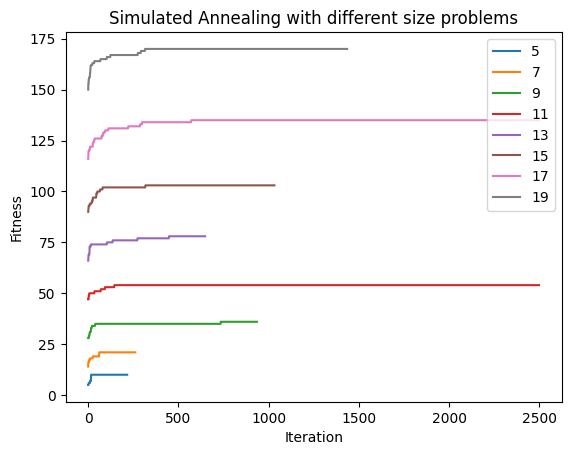

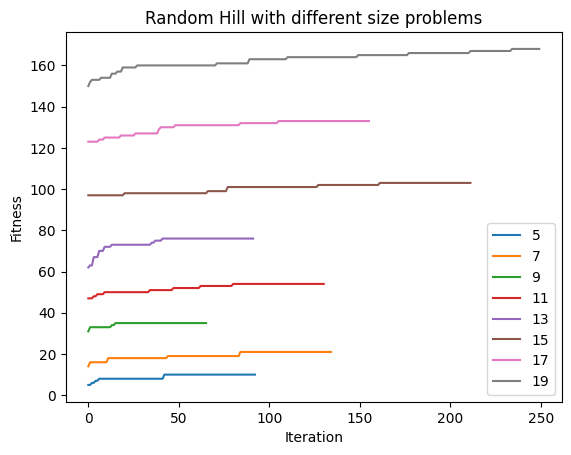

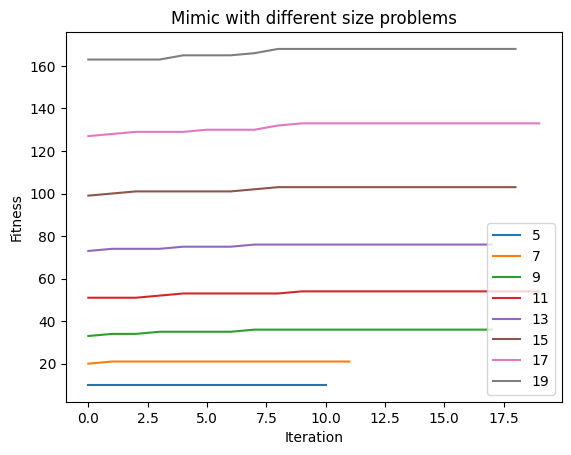

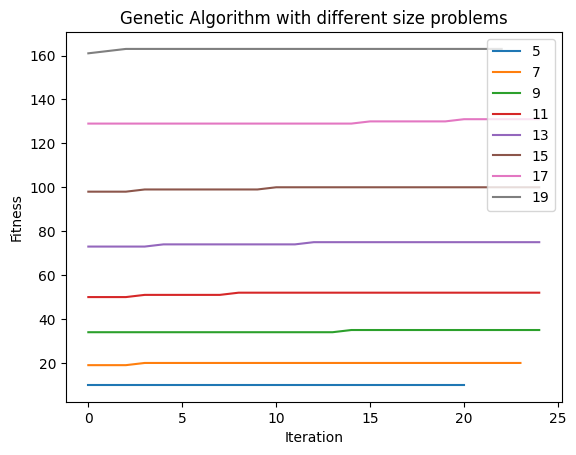

In [74]:
different_problem_size_graph(simulated_annealing, title='Simulated Annealing with different size problems')
different_problem_size_graph(random_hill, title='Random Hill with different size problems')
different_problem_size_graph(mimic, title='Mimic with different size problems')
different_problem_size_graph(genetic_algorithm, title='Genetic Algorithm with different size problems')

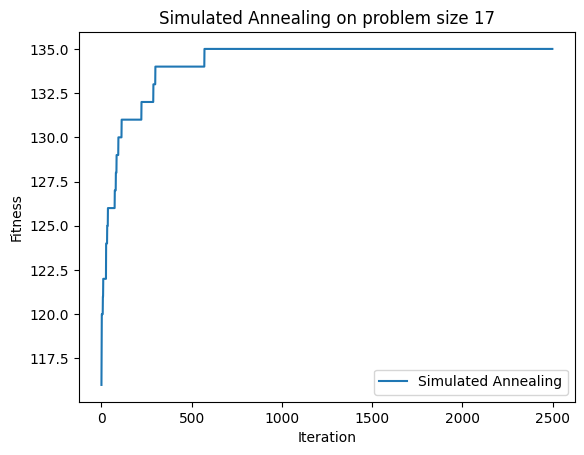

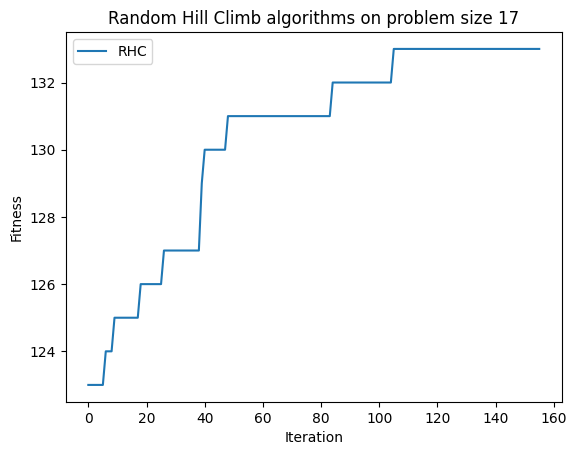

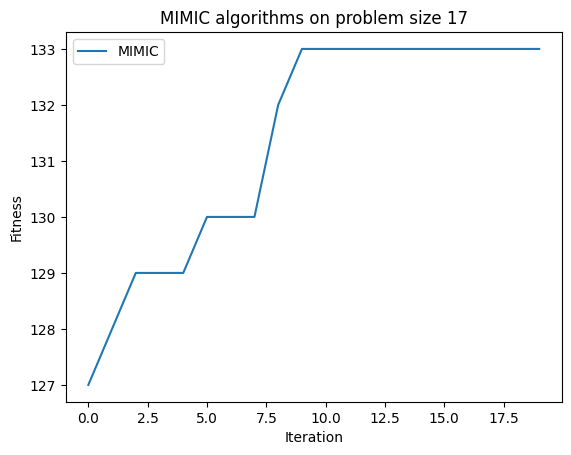

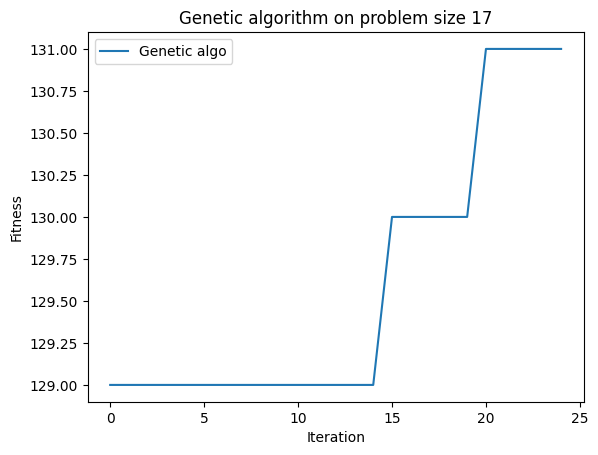

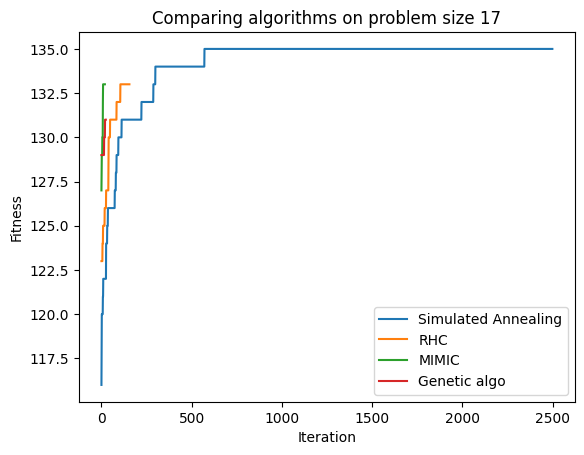

In [93]:
same_problem_graph(problems[6])